In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, timedelta


# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
data_recent = session.query(func.max(Measurement.date)).first()[0]
data_recent

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

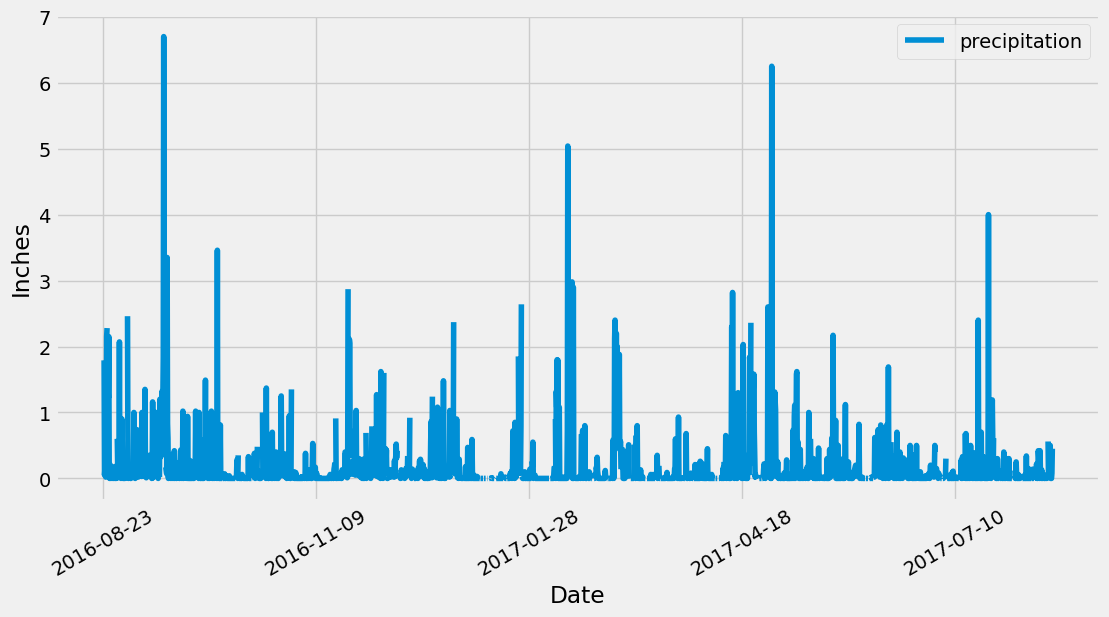

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
inital_date = date(2017,8,23)

last_date = inital_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prev_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Values = pd.DataFrame(prev_12, columns=['date','precipitation'])
Values.set_index('date',  inplace=True)

# Sort the dataframe by date
Values  = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
Values.plot(rot=30, xlabel = 'Date', ylabel='Inches', figsize=(12,6))

In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
Values.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset
Stations = session.query(Station.station).count()
Stations

9

In [94]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
high_temp,low_temp,avg_temp

((85.0,), (54.0,), (71.66378066378067,))

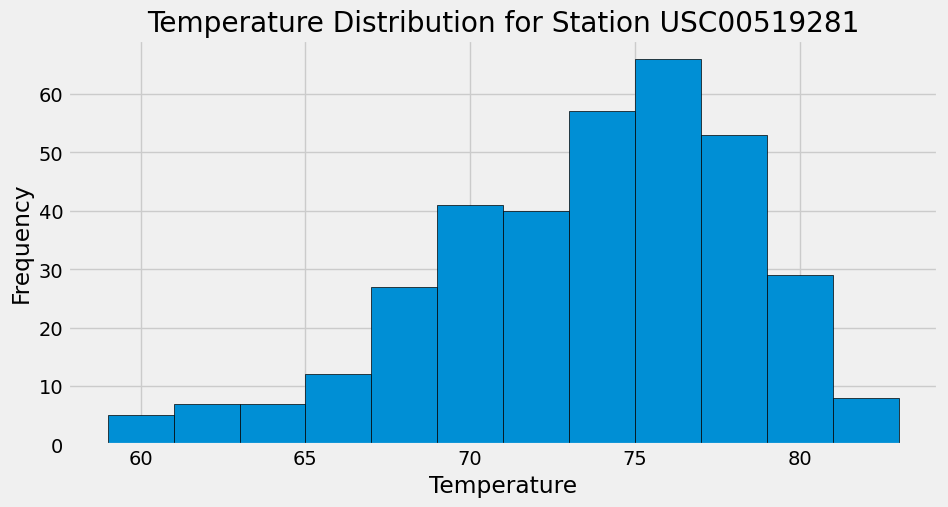

In [178]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= last_date).all()

df_station = pd.DataFrame(last_12, columns=['tobs'])

df_station['tobs'].plot(kind='hist', bins=12, figsize=(10, 5), edgecolor='black')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution for Station USC00519281')

plt.show()

# Close Session

In [181]:
# Close Session
session.close()